In [ ]:
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

In [ ]:
from roboflow import Roboflow

import supervision as sv
import cv2

loading Roboflow workspace...
loading Roboflow project...


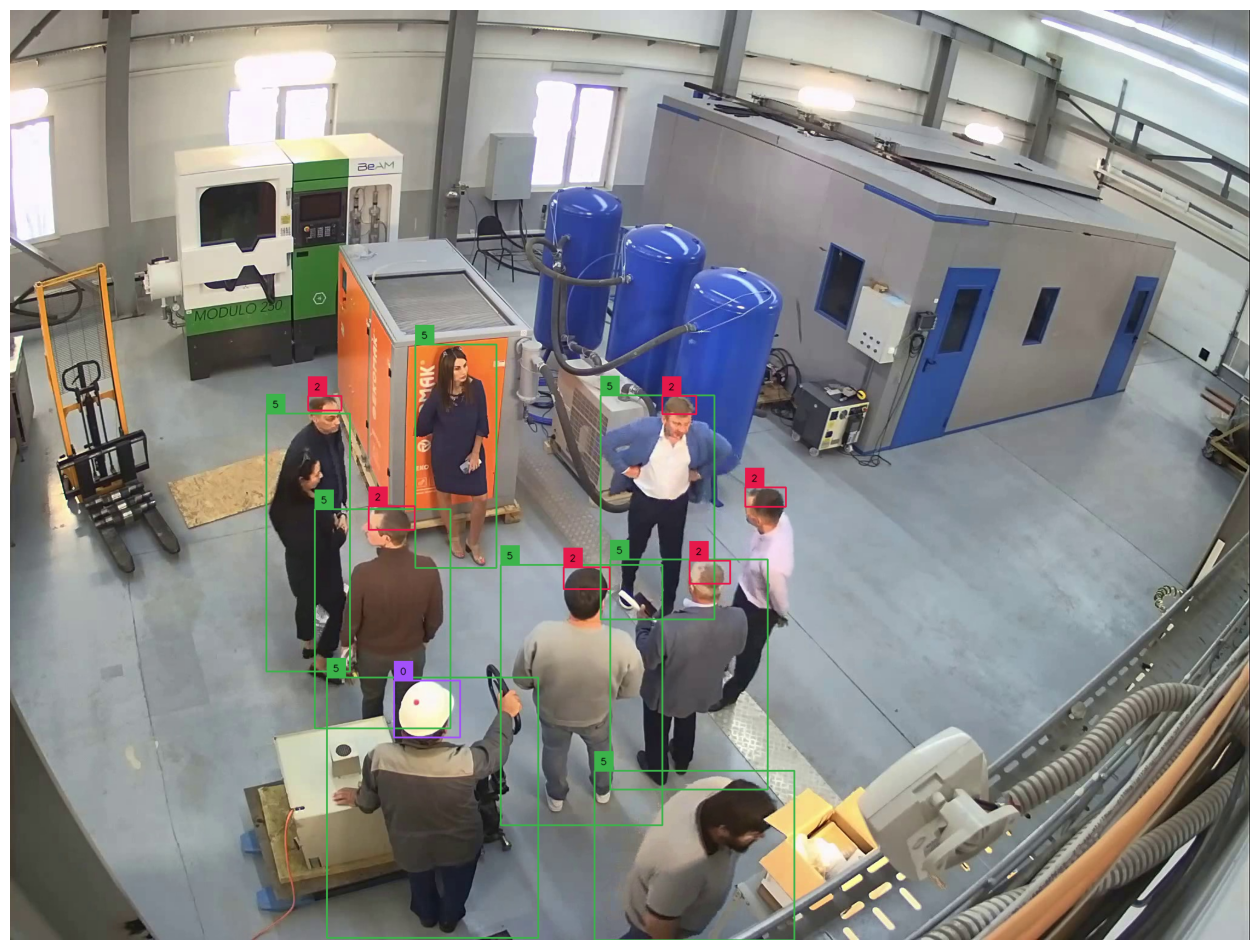

In [ ]:
rf = Roboflow(api_key="rWdXtXhlChpGGrLRl4cP")
project = rf.workspace().project("rudn")
model = project.version(5).model

# infer on a local image
image = "/content/file369_279_data_000199.jpg"

result = model.predict(image, confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread(image)

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

In [ ]:
import subprocess

# Путь к вашему скрипту
script_path = '/content/infer.sh'

# Выполнить команду chmod
subprocess.run(['chmod', '+x', script_path])

CompletedProcess(args=['chmod', '+x', '/content/infer.sh'], returncode=0)

In [ ]:
import os

# Установка переменной окружения ROBOFLOW_KEY
os.environ['ROBOFLOW_KEY'] = "rWdXtXhlChpGGrLRl4cP"

In [ ]:
ROBOFLOW_KEY="rWdXtXhlChpGGrLRl4cP"
!./infer.sh rudn/5 /content/file369_267.avi test.mov --fps_in 25 --fps_out 25 --scale 1

/bin/bash: line 1: ./infer.sh: No such file or directory
